In [3]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
pwd = os.getcwd()
filepath=os.path.join(pwd,"spam.csv").replace("\\", "/")

In [5]:
encodings=['utf-8', 'latin1', 'ISO-8859-1','cp1252']
for encoding in encodings:
    try:
        df = pd.read_csv(filepath, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}") 
        break 
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}") 
        continue 
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")

Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4597,ham,I'm stuck in da middle of da row on da right h...,NaN,NaN,NaN
366,spam,"Update_Now - Xmas Offer! Latest Motorola, Sony...",NaN,NaN,NaN
675,ham,"I dont knw pa, i just drink milk..",NaN,NaN,NaN
4593,ham,I had a good time too. Its nice to do somethin...,NaN,NaN,NaN
1454,ham,Can Ì_ all decide faster cos my sis going home...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
2462,ham,"Rose needs water, season needs change, poet ne..."
4556,ham,I am in hospital da. . I will return home in e...
4495,ham,"In case you wake up wondering where I am, I fo..."
1826,ham,Dude. What's up. How Teresa. Hope you have bee...
982,spam,Congrats! 2 mobile 3G Videophones R yours. cal...


In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1333,ham,"Oh... Icic... K lor, den meet other day..."
1504,ham,Oh my God. I'm almost home
5363,ham,"I think your mentor is , but not 100 percent s..."
2470,ham,Eat at old airport road... But now 630 oredi.....
481,ham,"Yo carlos, a few friends are already asking me..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['target']=encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt

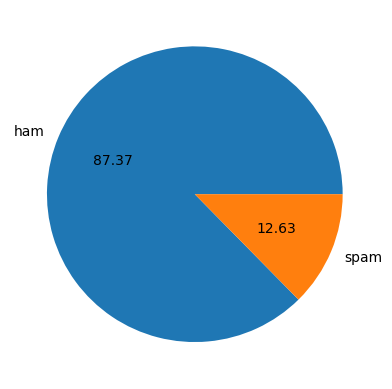

In [23]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
import nltk

In [26]:
nltk.download ('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters']=df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

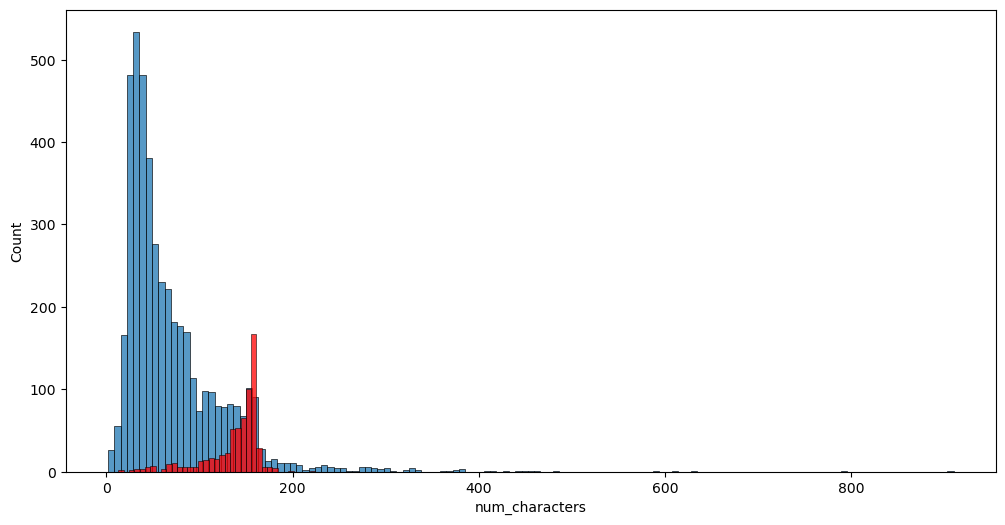

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df [df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

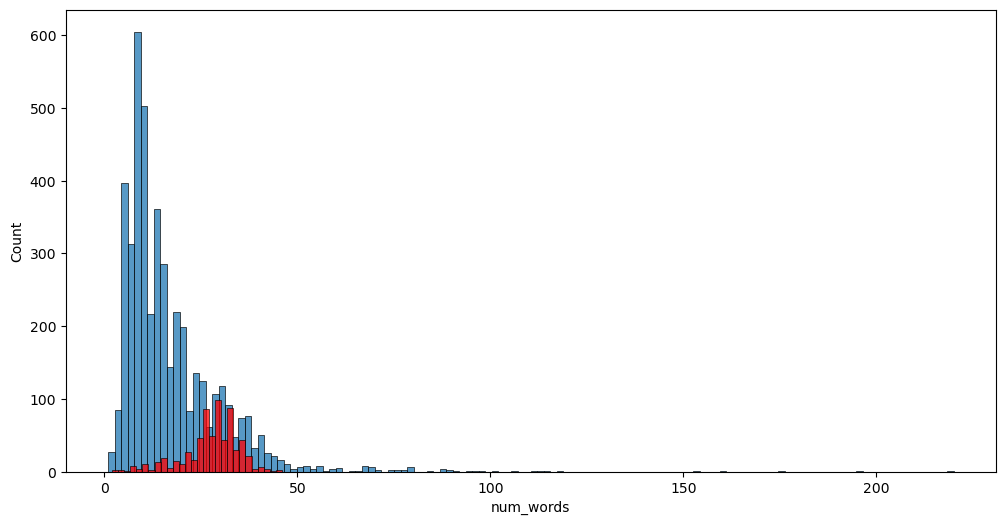

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df [df['target']==1]['num_words'], color='red')

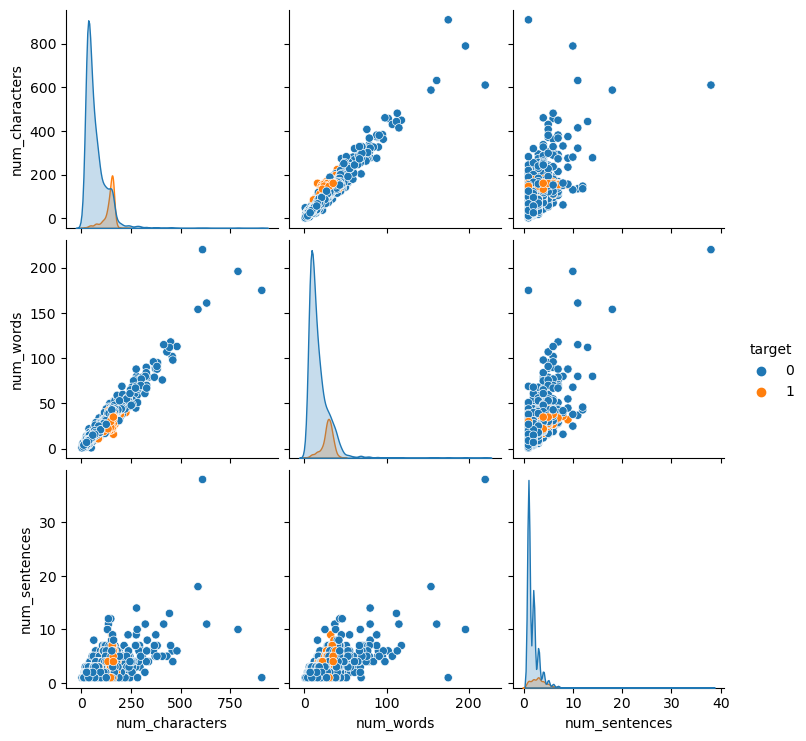

In [39]:
sns.pairplot(df, hue='target')

In [40]:
numeric_df = df.select_dtypes(include='number')
numeric_df

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


<Axes: >

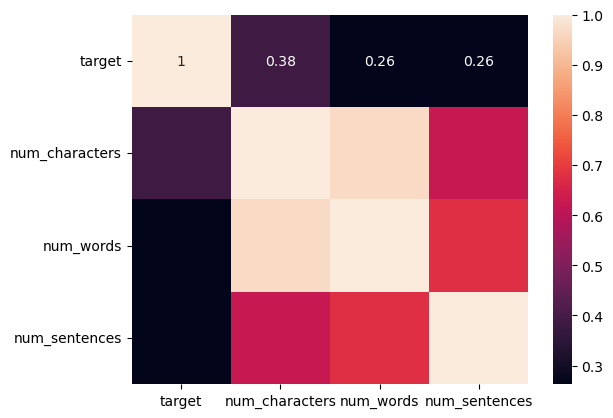

In [41]:
sns.heatmap(numeric_df.corr(),annot=True)

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download ('stopwords') # You may need to download the stopwords dataset
ps= PorterStemmer()
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum(): 
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words ('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:] 
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return" ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [44]:
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer() 
ps.stem("walking")

'walk'

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
!pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,max_font_size=10,background_color='white')

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 656.4 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.2 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.1 MB/s eta 0:00:00


In [59]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat (sep=""))

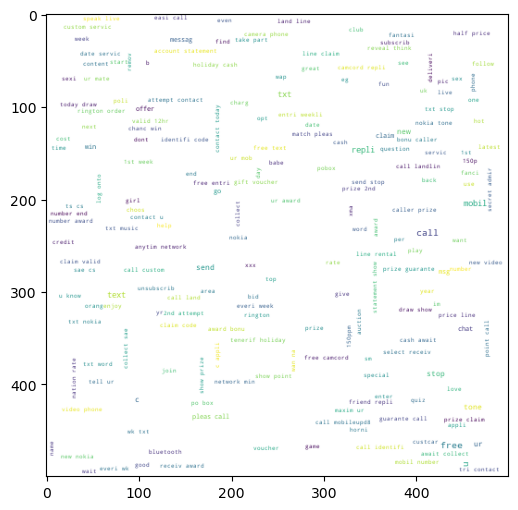

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [61]:
ham_wc=wc.generate(df [df['target']==0]['transformed_text'].str.cat(sep=""))

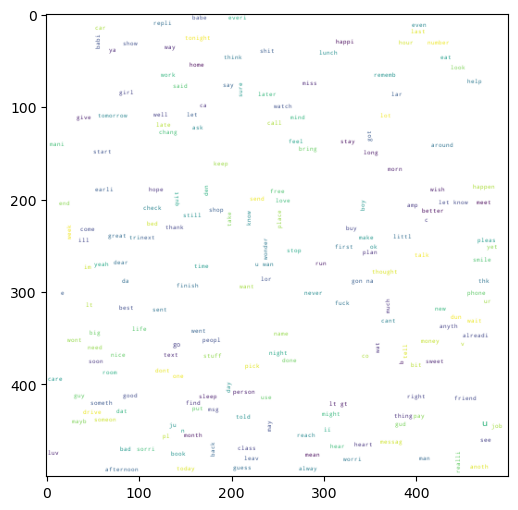

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
        for word in msg.split():
            spam_corpus.append(word)
len(spam_corpus)

9939

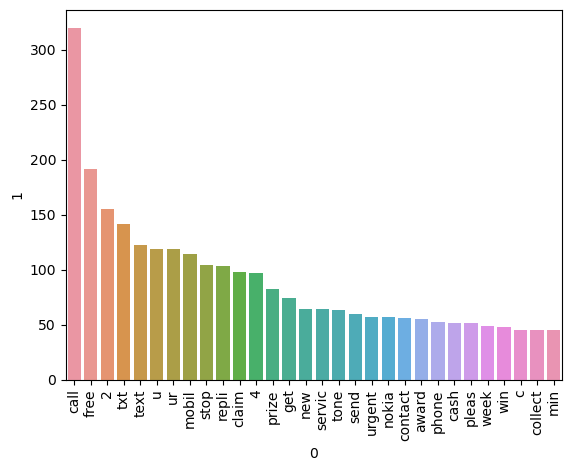

In [65]:
from collections import Counter
wo=pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
mo=pd.DataFrame(Counter(spam_corpus).most_common (30))[1]
sns.barplot(x=wo,y=mo)
plt.xticks(rotation="vertical")
plt.show()

In [66]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
        for word in msg.split():
            ham_corpus.append(word)
len(ham_corpus)

35404

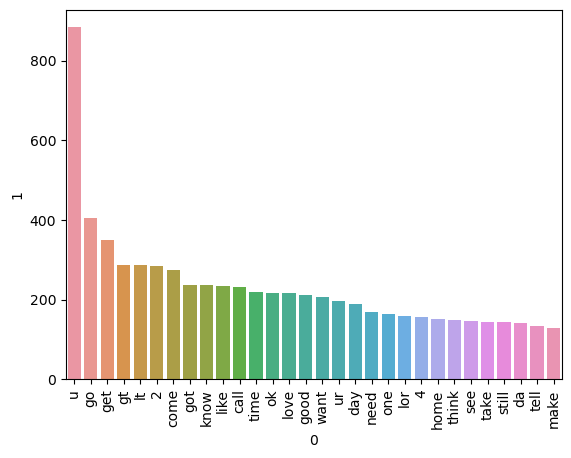

In [67]:
wo=pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
mo=pd.DataFrame(Counter(ham_corpus).most_common (30))[1]
sns.barplot(x=wo,y=mo)
plt.xticks(rotation="vertical")
plt.show()

In [68]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv = CountVectorizer()
tfidf= TfidfVectorizer (max_features=3000)


In [70]:
X = tfidf.fit_transform(df[ 'transformed_text']).toarray()

In [71]:
X.shape

(5169, 3000)

In [72]:
y=df['target'].values

In [73]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=2)


In [74]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb=GaussianNB()
mnb=MultinomialNB() 
bnb=BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [75]:
print(accuracy_score (y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score (y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [76]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score (y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score (y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [77]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score (y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score (y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [79]:

!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.1/99.8 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.3/99.8 MB 1.7 MB/s eta 0:00:58
   ---------------------------------------- 0.4/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.6/99.8 MB 2.2 MB/s eta 0:00:45
   ---------------------------------------- 1.0/99.8 MB 3.1 MB/s eta 0:00:33
    --------------------------------------- 1.3/99.8 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 2.2/99.8 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 2.3/99.8 MB 5.0 MB/s eta 0:00:20
    --------------------------------------- 2.4/99.8 MB 5.0 MB/s eta 0:00:20
    --------------------------------------- 2.4/99.8 MB 5.0 MB/s eta 0:00:20
    -----

In [81]:
svc=SVC (kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb= MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty="l1")
bc=BaggingClassifier(n_estimators=50, random_state=2)


rfc = RandomForestClassifier(n_estimators=50, random_state=2) 
abc = AdaBoostClassifier(n_estimators=50, random_state=2)


etc =ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier (n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [82]:
clfs = {
'SVC': svc,
 'KN': knc, 
'NB': mnb,
'DT': dtc,
'LR': lrc,
'RF': rfc, 
'AdaBoost': abc,
'Bgc': bc, 
'ETC': etc, 
'GBDT':gbdt,
'xgb':xgb}


In [83]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test) 
    accuracy= accuracy_score (y_test,y_pred) 
    precision=precision_score(y_test,y_pred)
    return accuracy, precision

In [84]:
train_classifier (svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [97]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy: 0.9758220502901354
Precision: 0.9747899159663865
For KN
Accuracy: 0.9052224371373307
Precision: 1.0
For NB
Accuracy: 0.9709864603481625
Precision: 1.0
For DT
Accuracy: 0.9274661508704062
Precision: 0.8118811881188119
For LR
Accuracy: 0.9584139264990329
Precision: 0.9702970297029703
For RF
Accuracy: 0.9758220502901354
Precision: 0.9829059829059829
For AdaBoost
Accuracy: 0.960348162475822
Precision: 0.9292035398230089
For Bgc
Accuracy: 0.9584139264990329
Precision: 0.8682170542635659
For ETC
Accuracy: 0.9748549323017408
Precision: 0.9745762711864406
For GBDT
Accuracy: 0.9468085106382979
Precision: 0.9191919191919192
For xgb
Accuracy: 0.9671179883945842
Precision: 0.9262295081967213


In [98]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [99]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217


In [100]:
performance_df1 = pd.melt (performance_df, id_vars= "Algorithm")

In [101]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,Bgc,Accuracy,0.958414


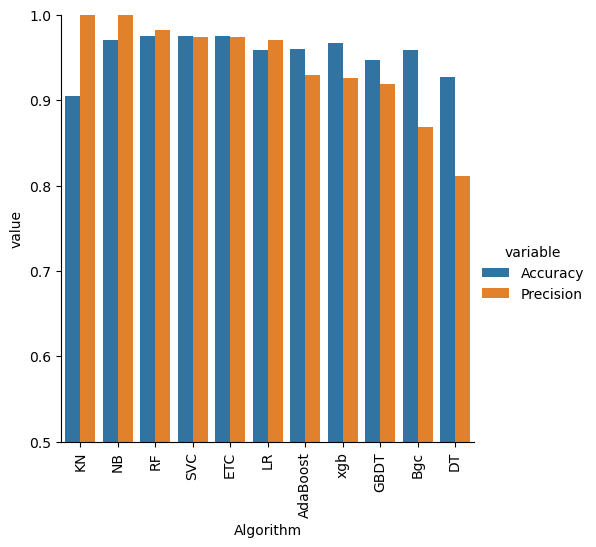

In [102]:
sns.catplot(x= 'Algorithm', y='value', hue='variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

In [103]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000' :precision_scores}).sort_values('Precision_max_ft_3000')
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [104]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_num_chars': accuracy_scores, 'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars')

In [105]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [106]:
Svc=SVC (kernel='sigmoid', gamma=1.0, probability=True)
mnb= MultinomialNB()
mnb.fit(X_train, y_train)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier (estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='hard')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [109]:
y_pred=voting.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [110]:
from sklearn.ensemble import StackingClassifier
estimators=[('svm', svc), ('nb', mnb), ('et', etc)] 
final_estimator=RandomForestClassifier()

clf=StackingClassifier (estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train) 
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision", precision_score (y_test,y_pred))

import pickle
pickle.dump(tfidf,open('vectorizer.pkl', 'wb')) 
pickle.dump(mnb, open('model.pkl', 'wb'))


Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [111]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB

# Sample text data and corresponding Labels (replace with your actual data) 
X_train = ["Sample text 1", "Sample text 2", "Sample text 3"] 
y_train = [0, 1, 0] # Example Labels (0 for negative, 1 for positive)

# Create and train the TF-IDF vectorizer
tfidf TfidfVectorizer (lowercase=True, stop_words='english') 
X_train_tfidf = tfidf.fit_transform(X_train)

# Create and train the Naive Bayes classifier
mnb = MultinomialNB() 
mnb.fit(X_train_tfidf, y_train)

# Save the trained TF-IDF vectorizer and Naive Bayes model to files with open('vectorizer.pkl', 'wb') as vectorizer_file: pickle.dump(tfidf, vectorizer_file)
with open('model.pkl', 'wb') as model_file: pickle.dump(mnb, model_file)
    pickle.dump(tfidf, vectorizer_file)
with open('model.pkl', 'wb') as model_file: pickle.dump(mnb, model_file)\
    picke.dump(mnb,model_file)

SyntaxError: invalid syntax (3792306656.py, line 10)